    Feature     Target
0  3.745401  10.664897
1  9.507143  21.416271
2  7.319939  17.823400
3  5.986585  10.998032
4  1.560186   5.681029
Linear Regression:
 MSE: 2.61, R^2: 0.93
Polynomial Regression:
 MSE: 2.54, R^2: 0.93
Scaled Linear Regression:
 MSE: 2.61, R^2: 0.93


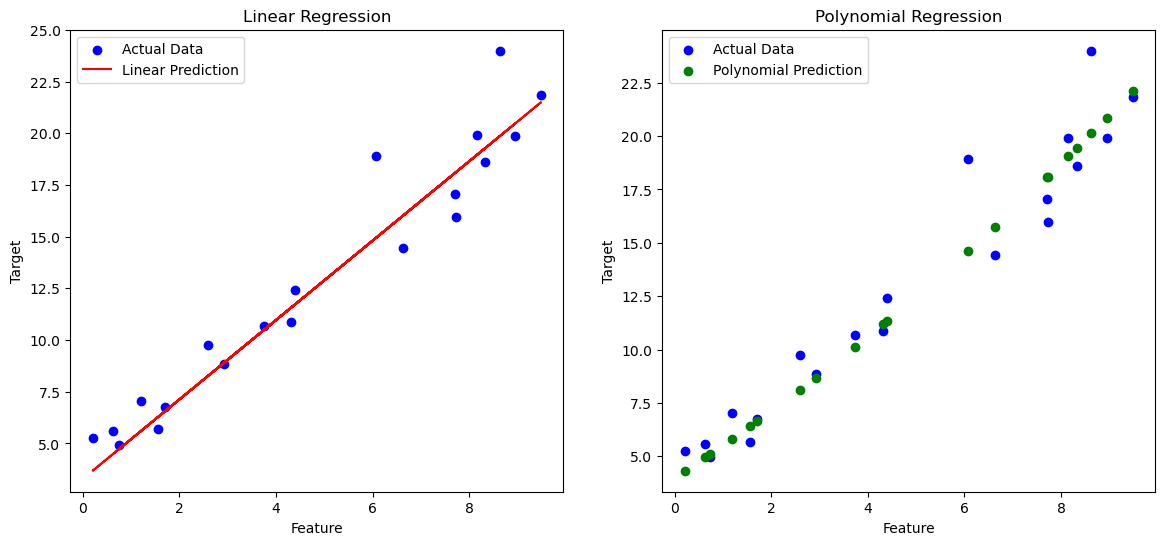

Testing Loaded Models...
Loaded Linear Regression:
 MSE: 2.61, R^2: 0.93
Loaded Polynomial Regression:
 MSE: 2.54, R^2: 0.93


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump, load

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features
y = 2 * X + 3 + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Convert to DataFrame for easier visualization
data = pd.DataFrame({'Feature': X.flatten(), 'Target': y.flatten()})
print(data.head())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Polynomial Regression (degree=2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Preprocessing (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train)

# Predictions for scaled data
y_pred_scaled = linear_model_scaled.predict(X_test_scaled)

# Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:\n MSE: {mse:.2f}, R^2: {r2:.2f}")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")
evaluate_model(y_test, y_pred_scaled, "Scaled Linear Regression")

# Visualize Results
plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Prediction')
plt.title("Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_poly, color='green', label='Polynomial Prediction')
plt.title("Polynomial Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

plt.show()

# Save Models
dump(linear_model, 'linear_model.joblib')
dump(poly_model, 'poly_model.joblib')
dump(scaler, 'scaler.joblib')

# Load Models
loaded_linear_model = load('linear_model.joblib')
loaded_poly_model = load('poly_model.joblib')
loaded_scaler = load('scaler.joblib')

# Test Loaded Models
print("Testing Loaded Models...")
y_pred_loaded_linear = loaded_linear_model.predict(X_test)
y_pred_loaded_poly = loaded_poly_model.predict(poly_features.transform(X_test))

evaluate_model(y_test, y_pred_loaded_linear, "Loaded Linear Regression")
evaluate_model(y_test, y_pred_loaded_poly, "Loaded Polynomial Regression")